In [1]:
import torch

In [2]:
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

In [3]:
import logging

In [4]:
import matplotlib.pyplot as plt


In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [6]:
text = "Here is the sentence I want embeddings for."
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank. embedding"
marked_text = "[CLS] " + text + " [SEP]"

print (marked_text)


[CLS] After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank. embedding [SEP]


In [7]:
tokenized_text = tokenizer.tokenize(marked_text)
print (tokenized_text)


['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', ',', 'the', 'bank', 'robber', 'was', 'seen', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', 'em', '##bed', '##ding', '[SEP]']


In [8]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [9]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

for tup in zip(tokenized_text, indexed_tokens):
  print (tup)

('[CLS]', 101)
('after', 2044)
('stealing', 11065)
('money', 2769)
('from', 2013)
('the', 1996)
('bank', 2924)
('vault', 11632)
(',', 1010)
('the', 1996)
('bank', 2924)
('robber', 27307)
('was', 2001)
('seen', 2464)
('fishing', 5645)
('on', 2006)
('the', 1996)
('mississippi', 5900)
('river', 2314)
('bank', 2924)
('.', 1012)
('em', 7861)
('##bed', 8270)
('##ding', 4667)
('[SEP]', 102)


In [10]:
segments_ids = [1] * len(tokenized_text)
print (segments_ids)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()



BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

In [12]:
# Predict hidden states features for each layer
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)


In [13]:
torch.mean(encoded_layers[11], 1)

tensor([[-5.1646e-02, -2.7428e-01, -4.2455e-02,  3.5630e-01,  7.8327e-01,
          2.1895e-01, -5.0150e-02,  4.8984e-01,  6.0959e-02, -3.9689e-01,
          6.3904e-02, -1.1114e-01,  2.5166e-02,  3.6832e-01, -4.7702e-01,
          1.8981e-01,  2.5177e-01,  8.4108e-02,  4.9402e-01,  1.2160e-01,
          1.0485e-01, -8.8513e-03,  1.6972e-01,  2.1172e-01,  3.5628e-01,
          1.1330e-01, -2.2521e-01,  1.0850e-01, -2.2228e-01,  2.6852e-01,
          5.1576e-01, -1.1650e-01,  1.5095e-01, -3.9875e-01, -1.3337e-01,
         -4.2994e-01, -2.3136e-01, -5.1193e-02, -1.0509e-01,  2.5181e-01,
         -3.0920e-01, -3.5429e-01, -2.4497e-01,  2.1342e-01,  5.6274e-02,
         -4.7383e-01, -9.8232e-02, -1.3003e-01, -1.7795e-01,  6.7389e-02,
         -3.1509e-01,  7.6815e-01, -6.1594e-01, -2.3484e-02,  1.0953e-01,
          6.5318e-01, -3.1962e-01, -6.5844e-01, -5.4310e-02, -1.0029e-01,
          3.4368e-01, -3.3413e-01,  3.7650e-01, -4.7105e-01,  8.7584e-02,
          6.1833e-03,  4.1972e-01,  1.

In [14]:
print ("Number of layers:", len(encoded_layers))
layer_i = 0

print ("Number of batches:", len(encoded_layers[layer_i]))
batch_i = 0

print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

Number of layers: 12
Number of batches: 1
Number of tokens: 25
Number of hidden units: 768


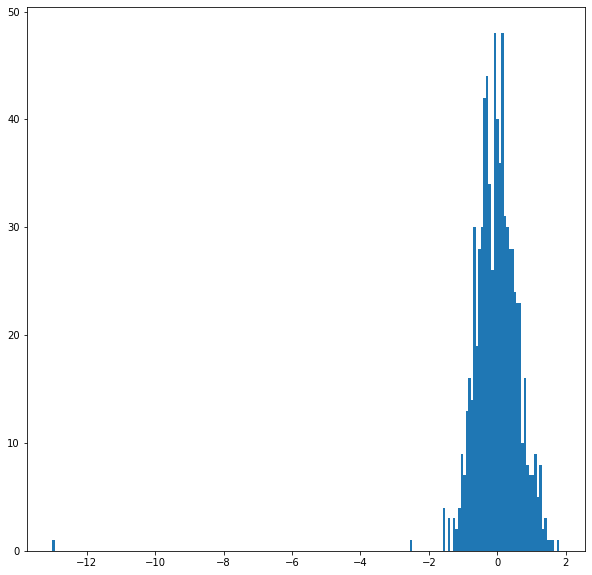

In [15]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [16]:
# Convert the hidden state embeddings into single token vectors

# Holds the list of 12 layer embeddings for each token
# Will have the shape: [# tokens, # layers, # features]
token_embeddings = [] 

# For each token in the sentence...
for token_i in range(len(tokenized_text)):
  
  # Holds 12 layers of hidden states for each token 
  hidden_layers = [] 
  
  # For each of the 12 layers...
  for layer_i in range(len(encoded_layers)):
    
    # Lookup the vector for `token_i` in `layer_i`
    vec = encoded_layers[layer_i][batch_i][token_i]
    
    hidden_layers.append(vec)
    
  token_embeddings.append(hidden_layers)

# Sanity check the dimensions:
print ("Number of tokens in sequence:", len(token_embeddings))
print ("Number of layers per token:", len(token_embeddings[0]))

Number of tokens in sequence: 25
Number of layers per token: 12


In [17]:
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat = []

# For each token in the sentence...
for token in token_embeddings:
    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), 0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 25 x 3072


In [18]:
### As an alternative method, let's try creating the word vectors by summing together the last four layers.


In [19]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# For each token in the sentence...
for token in token_embeddings:
    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(torch.stack(token)[-4:], 0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 25 x 768


In [20]:
sentence_embedding = torch.mean(encoded_layers[11], 1)

In [21]:
print ("Our final sentence embedding vector of shape:"), sentence_embedding[0].shape[0]

Our final sentence embedding vector of shape:


(None, 768)

In [22]:
print ("Our final sentence embedding vector of shape:"), sentence_embedding[0]

Our final sentence embedding vector of shape:


(None, tensor([-5.1646e-02, -2.7428e-01, -4.2455e-02,  3.5630e-01,  7.8327e-01,
          2.1895e-01, -5.0150e-02,  4.8984e-01,  6.0959e-02, -3.9689e-01,
          6.3904e-02, -1.1114e-01,  2.5166e-02,  3.6832e-01, -4.7702e-01,
          1.8981e-01,  2.5177e-01,  8.4108e-02,  4.9402e-01,  1.2160e-01,
          1.0485e-01, -8.8513e-03,  1.6972e-01,  2.1172e-01,  3.5628e-01,
          1.1330e-01, -2.2521e-01,  1.0850e-01, -2.2228e-01,  2.6852e-01,
          5.1576e-01, -1.1650e-01,  1.5095e-01, -3.9875e-01, -1.3337e-01,
         -4.2994e-01, -2.3136e-01, -5.1193e-02, -1.0509e-01,  2.5181e-01,
         -3.0920e-01, -3.5429e-01, -2.4497e-01,  2.1342e-01,  5.6274e-02,
         -4.7383e-01, -9.8232e-02, -1.3003e-01, -1.7795e-01,  6.7389e-02,
         -3.1509e-01,  7.6815e-01, -6.1594e-01, -2.3484e-02,  1.0953e-01,
          6.5318e-01, -3.1962e-01, -6.5844e-01, -5.4310e-02, -1.0029e-01,
          3.4368e-01, -3.3413e-01,  3.7650e-01, -4.7105e-01,  8.7584e-02,
          6.1833e-03,  4.1972e-0

In [23]:
import os

import spacy

# import gui

import re

import csv

import pandas as pd

import heapq

import numpy as np

import torch

from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

import logging

import matplotlib.pyplot as plt

In [24]:
def read_file(path):
    df = pd.read_csv(path,
                     sep='\t',
                     header=0
                     )

    df = df.dropna()
    df = df.reset_index(drop = True)
    return df


In [25]:
def bert_sent_emd(text):
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1] * len(tokenized_text)
    
    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])
    # Predict hidden states features for each layer
    with torch.no_grad():
        encoded_layers, _ = model(tokens_tensor, segments_tensors)
        
    return torch.mean(encoded_layers[11], 1)

In [26]:

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)


def jaccard_query_similarity(doc_path, query_path):
    df_query = pd.read_csv(query_path,
                     sep='\t',
                     header=0
                     )

    df = read_file(doc_path)

    jac_sim = list()
    head_w = 0.6
    cont_w = 1 - head_w

    # theme = df_query.iloc[0]['TAGS']
    # df_theme = df[df['TAGS'] == theme]
    # df_theme = df_theme.dropna()
    # df_theme = df_theme.reset_index(drop = True)

    # df_size = len(df_theme.index)
    df_size = len(df.index)



    for sl in range(df_size):
        # h_sim = jaccard_similarity(df_query.iloc[0]['TITLE'], df_theme.iloc[sl]['TITLE'])
        # c_sim = jaccard_similarity(df_query.iloc[0]['MAIN_CONTENT'], df_theme.iloc[sl]['MAIN_CONTENT'])
        h_sim = jaccard_similarity(df_query.iloc[0]['TITLE'], df.iloc[sl]['TITLE'])
        c_sim = jaccard_similarity(df_query.iloc[0]['MAIN_CONTENT'], df.iloc[sl]['MAIN_CONTENT'])
        q_w = head_w*h_sim + cont_w*c_sim
        jac_sim.append(q_w)

    # import operator
    # index, value = max(enumerate(jac_sim), key=operator.itemgetter(1))
    # similar_query = df_theme.loc[[index]]

    jac_sim = np.asarray(jac_sim)
    indx = jac_sim.argsort()[-5:][::-1]

    # print("#######################################################################################################")
    # print("JACCARD SIMILARITY")
    # print("#######################################################################################################")
    # print("jaccard Similarity: {}".format(value))
    # print("Similar query:\n", similar_query)
    # print("#######################################################################################################")

    print("#######################################################################################################")
    print("JACCARD SIMILARITY")
    print("#######################################################################################################")
    print("Top 5 Similar queries:\n")
    print(" ID               SUMMARY                      QUERY                            "
          "    THEME                   SIMILARITY")
    for temp, i in enumerate(indx):
        print(df.loc[[i]].to_string(header=False, index=False), jac_sim[indx[temp]])
    print("#######################################################################################################")

#######################################################################################################################


#######################################################################################################################
# doc_l = list()

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

In [28]:

def cosine_similarity_1(spacy_model, query, document):
    doc1 = spacy_model(query)
    doc2 = spacy_model(document)
    return doc1.similarity(doc2)

In [29]:
def cosine_query_similarity(doc_path, query_path):
    df_query = pd.read_csv(query_path,
                           sep='\t',
                           header=0
                           )

    df = read_file(doc_path)

    cos_sim = list()
    headc_w = 0.6
    contc_w = 1 - headc_w

    # theme = df_query.iloc[0]['TAGS']
    # df_theme_c = df[df['TAGS'] == theme]
    # df_theme_c = df_theme_c.dropna()
    # df_theme_c = df_theme_c.reset_index(drop=True)

    # df_size = len(df_theme_c.index)
    df_size = len(df.index)


    nlp_e = spacy.load(r"spacy.word2vec.model")

    for ind in range(df_size):
        # h_sim = cosine_similarity(nlp_e, df_query.iloc[0]['TITLE'], df_theme_c.iloc[ind]['TITLE'])
        # c_sim = cosine_similarity(nlp_e, df_query.iloc[0]['MAIN_CONTENT'], df_theme_c.iloc[ind]['MAIN_CONTENT'])
        h_sim = cosine_similarity_1(nlp_e,df_query.iloc[0]['TITLE'], df.iloc[ind]['TITLE'])
        c_sim = cosine_similarity_1(nlp_e, df_query.iloc[0]['MAIN_CONTENT'], df.iloc[ind]['MAIN_CONTENT'])
        q_w = headc_w*h_sim + contc_w*c_sim
        cos_sim.append(q_w)

    # import operator
    # index, value = max(enumerate(cos_sim), key=operator.itemgetter(1))

    cos_sim = np.asarray(cos_sim)
    indx = cos_sim.argsort()[-5:][::-1]

    # print(indx)
    # print(cos_sim[indx])


    print("#######################################################################################################")
    print("COSINE SIMILARITY")
    print("#######################################################################################################")
    print("Top 5 Similar queries:\n")
    print(" ID               SUMMARY                      QUERY                            "
          "    THEME                   SIMILARITY")
    for temp, i in enumerate(indx):
        print(df.loc[[i]].to_string(header=False, index=False), cos_sim[indx[temp]])
    print("#######################################################################################################")


In [30]:
def cosine_query__bert_similarity(doc_path, query_path):
    df_query = pd.read_csv(query_path,
                           sep='\t',
                           header=0
                           )

    df = read_file(doc_path)

    cos_sim = list()
    headc_w = 0.6
    contc_w = 1 - headc_w

    # theme = df_query.iloc[0]['TAGS']
    # df_theme_c = df[df['TAGS'] == theme]
    # df_theme_c = df_theme_c.dropna()
    # df_theme_c = df_theme_c.reset_index(drop=True)

    # df_size = len(df_theme_c.index)
    df_size = len(df.index)


#     nlp_e = spacy.load(r"spacy.word2vec.model")

    for ind in range(df_size):
#         print(ind)
        # h_sim = cosine_similarity(nlp_e, df_query.iloc[0]['TITLE'], df_theme_c.iloc[ind]['TITLE'])
        # c_sim = cosine_similarity(nlp_e, df_query.iloc[0]['MAIN_CONTENT'], df_theme_c.iloc[ind]['MAIN_CONTENT'])
#         c = bert_sent_emd(df_query.iloc[0]['TITLE']).shape
#         d = bert_sent_emd(df_query.iloc[ind]['TITLE']).shape
        
#         print(c, d)
        h_sim = cosine_similarity(bert_sent_emd(df_query.iloc[0]['TITLE']).reshape(1,-1), bert_sent_emd(df.iloc[ind]['TITLE']).reshape(1,-1))[0][0]
#         print(h_sim)
#         h_sim = cosine_similarity(nlp_e,df_query.iloc[0]['TITLE'], df.iloc[ind]['TITLE'])
        c_sim = cosine_similarity(bert_sent_emd(df_query.iloc[0]['MAIN_CONTENT']).reshape(1,-1), bert_sent_emd(df.iloc[ind]['MAIN_CONTENT']).reshape(1,-1))[0][0]
#         c_sim = cosine_similarity(nlp_e, df_query.iloc[0]['MAIN_CONTENT'], df.iloc[ind]['MAIN_CONTENT'])
        q_w = headc_w*h_sim + contc_w*c_sim
        cos_sim.append(q_w)

    # import operator
    # index, value = max(enumerate(cos_sim), key=operator.itemgetter(1))

    cos_sim = np.asarray(cos_sim)
    indx = cos_sim.argsort()[-5:][::-1]

    # print(indx)
    # print(cos_sim[indx])


    print("#######################################################################################################")
    print("COSINE SIMILARITY BERT")
    print("#######################################################################################################")
    print("Top 5 Similar queries:\n")
    print(" ID               SUMMARY                      QUERY                            "
          "    THEME                   SIMILARITY")
    for temp, i in enumerate(indx):
        print(df.loc[[i]].to_string(header=False, index=False), cos_sim[indx[temp]])
    print("#######################################################################################################")

In [31]:
if __name__== "__main__":

    # desired_width = 1000
    # pd.set_option('display.width', desired_width)
    # pd.set_option('display.max_columns', 10)
    # 
    # app = gui.Post()
    # app.run()

    cosine_query_similarity("dataset/PIAZZA_clean_single_theme.tsv", "query.tsv")

    print("\n")

    jaccard_query_similarity("dataset/PIAZZA_clean_single_theme.tsv", "query.tsv")
    
    print()
    
    cosine_query__bert_similarity("dataset/PIAZZA_clean_single_theme.tsv", "query.tsv")

#######################################################################################################
COSINE SIMILARITY
#######################################################################################################
Top 5 Similar queries:

 ID               SUMMARY                      QUERY                                THEME                   SIMILARITY
 jc7ohpgq60i6kk  opencv cmake error  make build folder write follow command sudo cm...  planter_bot 0.999773990071659
 jbro40nu6zk22w  error opencv installation  follwe step perfectly get opencv installation  planter_bot 0.9997725912110422
 jcop2x2n7zj4h  error opencv  cv imshow work asking rebuild opencv undergoing  planter_bot 0.9997551989355732
 jd8dyl1ypbrer  error  camera work fine suddenly show error tell erro...  planter_bot 0.9997258517400738
 jag8lqtnqp65pa  error  get indent error output file get output run fi...  harvester_bot 0.9996786248019801
####################################################################